# Explorative Data Analysis

Visual representation of data  <br />
matplot lib is used for static framework

In [1]:
import pandas as pd
import matplotlib
##%matplotlib inline


import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows',500)

sns.set(style="darkgrid")

datapath ='../data/processed/COVID_small_dataset.csv'
df_plot = pd.read_csv(datapath,sep=';')

df_plot.head()

,date,India,US,Germany,Australia,United Kingdom
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,4,0


<Figure size 1152x648 with 0 Axes>

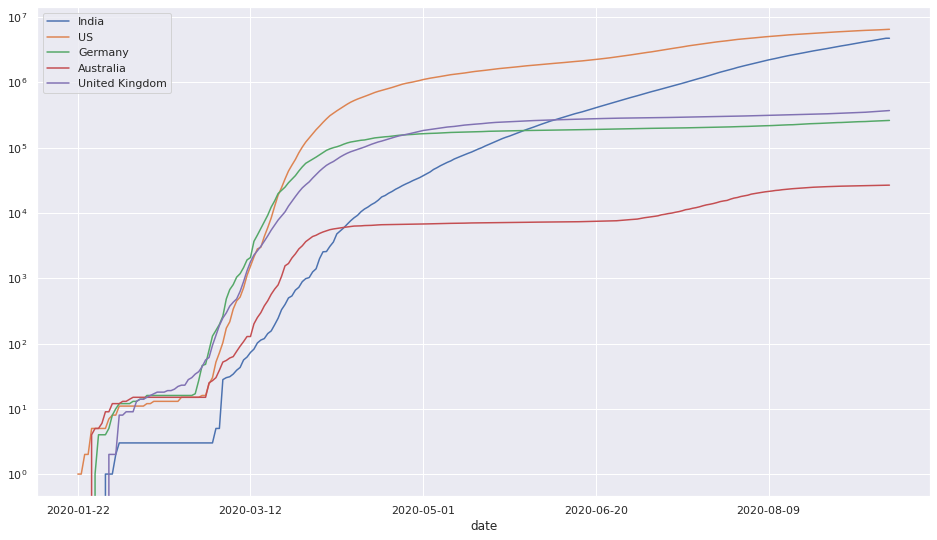

In [2]:
plt.figure();
ax=df_plot.set_index('date').plot()
ax.set_yscale('log')

# EDA Dynamic Plots

plot.ly is one of the dynamic framework 

In [3]:
import plotly.graph_objects as go
import plotly

fig = go.Figure() 

country_list = ['India', 
                'US', 
                'Germany',
                'Australia',
                'United Kingdom'
                ]

##defines how to plot the individual trace
for each in country_list:     
    fig.add_trace(go.Scatter(x=df_plot.date,
                            y= df_plot[each],
                            mode='markers+lines', 
                            name=each))
    
## defines the overall layout properties
fig.update_layout(
    width=900,
    height=600,
    xaxis_title='Time',
    yaxis_title='Confirmed infected people (source johns hopkins csse, log scale)')

fig.update_yaxes(type='log', range=[1,7])


fig.update_layout(xaxis_rangeslider_visible=True)

ModuleNotFoundError: No module named 'plotly'

# Slicing data on Dynamic dashboard

In [ ]:
import dash 
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

fig.update_layout(
    width=900,
    height=600,
    xaxis_title='Time',
    yaxis_title='Confirmed infected people (source johns hopkins csse, log scale)')

fig.update_yaxes(type='log', range=[1,7])

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'India', 'value': 'India'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Australia', 'value': 'Australia'},
            {'label': 'United Kingdom', 'value': 'United Kingdom'}
        ],
        value=['India', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                 
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)